In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# reading the input file

lead = pd.read_csv("Leads.csv")

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead.shape

(9240, 37)

In [4]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
# count the number of null values present in the data

round(lead.isnull().sum()/len(lead.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### From the above percentages we observe the following about columns having more than 30% missing values

    - Tags
    - Lead Quality
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index
    - Asymmetrique Activity Score
    - Asymmetrique Profile Score

### Let us see what kind of values are present in these columns and then take a call on them

In [6]:
lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### We can see that 'Tags' (37% null values) has a lot of variables which will  be difficult to group together and are very subjective in nature. Hence we will be removing this column from consideration

In [7]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Despite having more than 50% data ot avilable, we would still want to have this variable present in the data and will group some of the data otgether

In [8]:
lead['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [9]:
lead['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [10]:
lead['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

#### It feels like the above three columns are somewhat co-related and we may not need to keep all 3 of them toegther. Moving forward, we will perform co-relating matrix and then remove some of the highly corelated matrix

### We will now visualise some of the columns present in the data base to see what kind of data is available in them

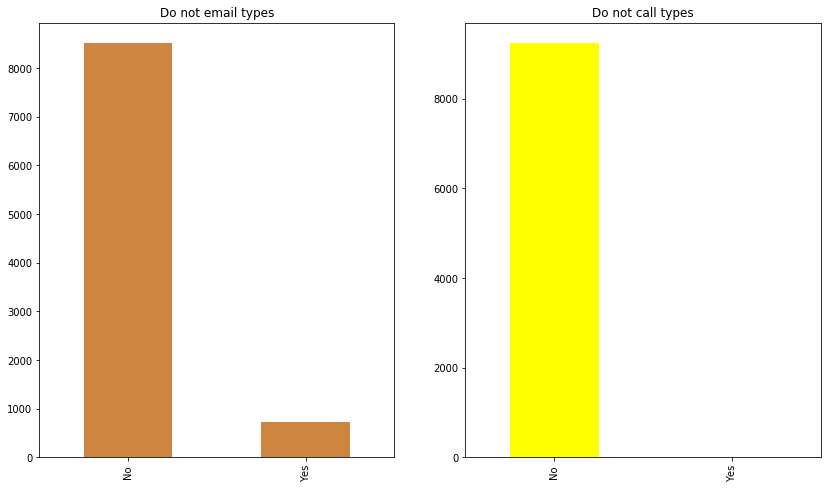

In [11]:
plt.subplot(1,2,1)

ax = lead['Do Not Email'].value_counts().plot(kind='bar',facecolor = 'peru',figsize=(14,8),title ="Do not email types")

plt.subplot(1,2,2)

ax = lead['Do Not Call'].value_counts().plot(kind='bar',facecolor = 'yellow',figsize=(14,8),title ="Do not call types")

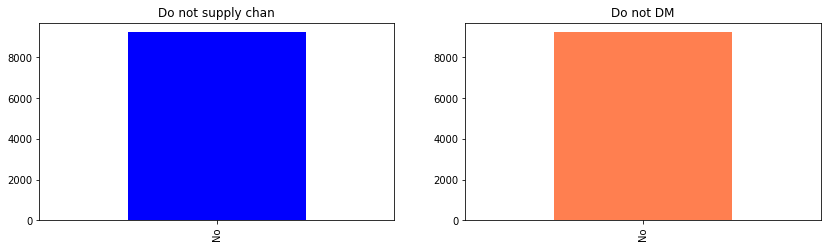

In [12]:
plt.subplot(2,2,1)

ax = lead['Update me on Supply Chain Content'].value_counts().plot(kind='bar',facecolor = 'blue',figsize=(14,8),title ="Do not supply chan")

plt.subplot(2,2,2)

ax = lead['Get updates on DM Content'].value_counts().plot(kind='bar',facecolor = 'coral',figsize=(14,8),title ="Do not DM")

#### We can see from the above plotted charts that these two columns are primarily (>95%) is filled with one type of information only. Hence there is no variation or added insight that is provided due to these columns, we can definitely remove these colums

#### Till now, we can see that the following columns have to be dropped from our analysis -

    - Do not call
    - Do not email
    - Update me on Supply Chain content
    - Get updates on DM content
    - Tags
    
#### We will be performing visual EDA on the rest of the columns before we can take make better decisions on them

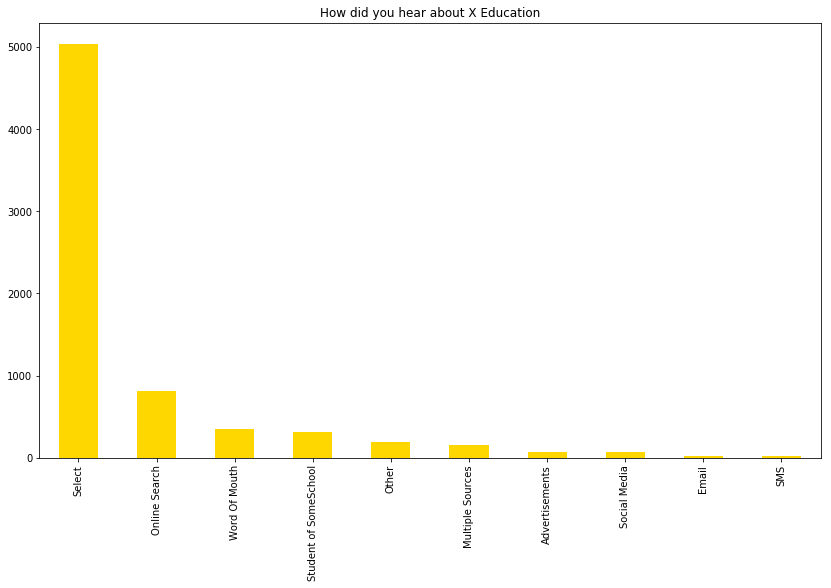

In [13]:
ax = lead['How did you hear about X Education'].value_counts().plot(kind='bar',facecolor = 'gold',figsize=(14,8),title ="How did you hear about X Education")

#### 'Select' is a default option which, as we can see, many people use. However, this is not adding any additional detail to the model. We will be converting 'Select' to NA. Please note that we can already see that this variable had ~30% nul values already

In [14]:
lead['How did you hear about X Education'].fillna('NA', inplace=True)
lead['How did you hear about X Education'].replace(to_replace='Select', value='NA', inplace=True)
lead['How did you hear about X Education'].value_counts()/len(lead['How did you hear about X Education'])*100

NA                       78.463203
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

#### We can see that more than 75% of the total data is null and hence can be dropped

In [15]:
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### ~ 30% of the data in this column is missing and the rest as ~100% of the data filled with 1 value. Since this column is not adding any value to the overall model, we can drop this column

In [16]:
lead['What is your current occupation'].value_counts()/len(lead['What is your current occupation'])*100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### We notice that even this column has ~ 30% of the data missing and the rest 70 has ~61% filled with only one type of data. Hence we will be removing this data since it is not adding much value to the data model

In [17]:
lead['Specialization'].value_counts()/len(lead['Specialization'])*100

Select                               21.017316
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [18]:
lead['I agree to pay the amount through cheque'].value_counts()/len(lead['I agree to pay the amount through cheque'])*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [19]:
lead['A free copy of Mastering The Interview'].value_counts()/len(lead['I agree to pay the amount through cheque'])*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [20]:
lead['Country'].value_counts()/len(lead['Country'])*100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Nigeria                  0.043290
South Africa             0.043290
Canada                   0.043290
Germany                  0.043290
Kuwait                   0.043290
Sweden                   0.032468
Netherlands              0.021645
Philippines              0.021645
Italy                    0.021645
Uganda                   0.021645
Belgium                  0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Bangladesh               0.021645
China                    0.021645
Denmark                  0.010823
Malaysia      

In [21]:
lead['City'].value_counts()/len(lead['City'])*100

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [22]:
lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [23]:
lead['Lead Profile'].fillna('NA', inplace=True)
lead['Lead Profile'].replace(to_replace='Select', value='NA', inplace=True)
lead['Lead Profile'].value_counts()/len(lead['Lead Profile'])*100

NA                             74.188312
Potential Lead                 17.456710
Other Leads                     5.270563
Student of SomeSchool           2.608225
Lateral Student                 0.259740
Dual Specialization Student     0.216450
Name: Lead Profile, dtype: float64

#### We can remove the above five columns from the data model

In [24]:
lead['Specialization'].fillna('NA', inplace=True)
lead['Specialization'].replace(to_replace='Select', value='NA', inplace=True)
lead['Specialization'].value_counts()/len(lead['Specialization'])*100

NA                                   36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### So the columns which we have decided to remove are as follows - 

    - Do not call
    - Do not email
    - Update me on Supply Chain content
    - Get updates on DM content
    - Tags
    - How did you hear about X Education
    - What is your current occupation
    - What matters most to you in choosing a course
    - A free copy of Mastering The Interview
    - I agree to pay the amount through cheque
    - Country
    - Asymmetrique Activity Score (have a categorical variable associated with this score)
    - Asymmetrique Profile Score (have a categorical variable associated with this score)
    - Prospect ID (We already have a unique identifier 'Lead number' hence wont be needing this) 
    - Lead Profile

In [25]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   9240 

In [26]:
lead2 = lead.drop(['Do Not Call','Do Not Email','Update me on Supply Chain Content','Get updates on DM Content',
                'Tags','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course',
                   'A free copy of Mastering The Interview','I agree to pay the amount through cheque','Country','Asymmetrique Profile Score',
                  'Asymmetrique Activity Score','Prospect ID','Search','Lead Profile'], axis = 1)

lead2.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Magazine,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,No,...,No,No,No,No,No,Low in Relevance,Select,02.Medium,02.Medium,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NA,No,...,No,No,No,No,No,NaN,Select,02.Medium,02.Medium,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,No,...,No,No,No,No,No,Might be,Mumbai,02.Medium,01.High,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,...,No,No,No,No,No,Not Sure,Mumbai,02.Medium,01.High,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NA,No,...,No,No,No,No,No,Might be,Mumbai,02.Medium,01.High,Modified


### The categorical variables that we have left, we will try to bin most of the them so that we can remove the number of dummy variables we have in the data model

In [27]:
lead2['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
testone                 1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

#### We can categorise these variables into the following bins- 

    - Direct - Direct traffic
    - Paid - Google, google, Welingnak Website, pay per click Ads, Facebook, bing
    - Organic (Not paid) - Oragnic Search
    - Indirect - Olark Chat, Referral Sites, click2call,Live chat, Social Media, Press Release, NC

In [28]:
def lead_source(row):
    if row['Lead Source'] == 'Direct Traffic':
        return 'Direct'
    if row['Lead Source'] in ['Google','bing','google','Welingak Website','Pay per Click Ads']:
        return 'Paid'
    if row['Lead Source'] == 'Organic Search':
        return 'Organic Search'
    else:
        return 'Indirect'

lead2['lead_source_group'] = lead2.apply(lead_source, axis =1)

lead2['lead_source_group'].value_counts()

Paid              3022
Direct            2543
Indirect          2521
Organic Search    1154
Name: lead_source_group, dtype: int64

In [29]:
lead2['Lead Quality'].fillna('NA', inplace = True)
lead2['Lead Quality'].value_counts()

NA                   4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### We can categorise these variables in the following -

    - High - High in relevance
    - Medium - Might be/ Not Sure
    - Low - Worst/Low in relevance
    - NA - Not available

In [30]:
def lead_quality(row):
    if row['Lead Quality'] == 'High in Relevance':
        return 'High'
    if row['Lead Quality'] in ['Might be','Not Sure']:
        return 'Medium'
    if row['Lead Quality'] in ['Worst','Low in Relevance']:
        return 'Low'
    else:
        return 'NA'
    
lead2['lead_quality_group'] = lead2.apply(lead_quality,axis=1)

lead2['lead_quality_group'].value_counts()

lead2.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Magazine,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,lead_source_group,lead_quality_group
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NA,No,...,No,No,No,Low in Relevance,Select,02.Medium,02.Medium,Modified,Indirect,Low
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,NA,No,...,No,No,No,NA,Select,02.Medium,02.Medium,Email Opened,Organic Search,NA
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,No,...,No,No,No,Might be,Mumbai,02.Medium,01.High,Email Opened,Direct,Medium
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,No,...,No,No,No,Not Sure,Mumbai,02.Medium,01.High,Modified,Direct,Medium
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NA,No,...,No,No,No,Might be,Mumbai,02.Medium,01.High,Modified,Paid,Medium


In [31]:
lead2['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [32]:
lead2['City'].value_counts()/len(lead2['City'])*100

Mumbai                         34.870130
Select                         24.339827
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [33]:
lead2['City'].fillna('NA',inplace =True)
lead2['City'].replace(to_replace = 'Select', value = 'NA',inplace = True)
lead2['City'].replace(to_replace = ['Thane & Outskirts','Mumbai','Other Cities of Maharashtra'], value = 'Cities of Maharashtra',inplace = True)
lead2['City'].value_counts()

Cities of Maharashtra    4431
NA                       3669
Other Cities              686
Other Metro Cities        380
Tier II Cities             74
Name: City, dtype: int64

In [34]:
lead2['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [35]:
lead2['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [36]:
lead2['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [37]:
lead2['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [38]:
lead2['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [39]:
lead2['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [40]:
lead2['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

#### We can group Lead Add form, lead import, and quick add form into 'Others'

In [41]:
def lead_origin(row):
    if row['Lead Origin'] in ['Lead Add Form','Lead Import','Quick Add Form ']:
        return 'Others'
    if row['Lead Origin'] == 'Landing Page Submission':
        return 'Landing Page Submission'
    if row['Lead Origin'] == 'API':
        return 'API'
    
lead2['Lead_Origin_group'] = lead2.apply(lead_origin,axis=1)

lead2['Lead_Origin_group'].value_counts()

Landing Page Submission    4886
API                        3580
Others                      773
Name: Lead_Origin_group, dtype: int64

In [42]:
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            9240 non-null object
Magazine                                  9240 non-null object
Newspaper Article                         9240 non-null object
X Education Forums                        9240 non-null object
Newspaper                                 9240 non-null object
Digital Advertisement                     9240 non-null object
Through Reco

#### We can now drop some of the for which we have already created derived variables -

    - Lead Origin
    - Lead Source
    - Last notable activity (redundant)
    - Lead Quality
    - Receive More Updates About Our Courses (all records had no)
    - Digital Advertisement (>95% had same record)
    - through recommendations (all records have same value)
    - Newspaper (all records have same value)
    - Magazeine (all records have same value)
    - X Education Forums (all records have same value)
    - Newspaper Article (all records have mostly the smae value)

In [43]:
lead3 = lead2.drop(['Lead Origin','Lead Source','Last Notable Activity','Last Notable Activity','Receive More Updates About Our Courses'
                    ,'Digital Advertisement','Through Recommendations','Newspaper','Digital Advertisement','Magazine','X Education Forums',
                    'Newspaper Article','Lead Quality'],axis=1)

lead3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                    9240 non-null int64
Converted                      9240 non-null int64
TotalVisits                    9103 non-null float64
Total Time Spent on Website    9240 non-null int64
Page Views Per Visit           9103 non-null float64
Last Activity                  9137 non-null object
Specialization                 9240 non-null object
City                           9240 non-null object
Asymmetrique Activity Index    5022 non-null object
Asymmetrique Profile Index     5022 non-null object
lead_source_group              9240 non-null object
lead_quality_group             9240 non-null object
Lead_Origin_group              9239 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 938.5+ KB


In [44]:
lead3.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,Asymmetrique Activity Index,Asymmetrique Profile Index,lead_source_group,lead_quality_group,Lead_Origin_group
0,660737,0,0.0,0,0.0,Page Visited on Website,NA,NA,02.Medium,02.Medium,Indirect,Low,API
1,660728,0,5.0,674,2.5,Email Opened,NA,NA,02.Medium,02.Medium,Organic Search,NA,API
2,660727,1,2.0,1532,2.0,Email Opened,Business Administration,Cities of Maharashtra,02.Medium,01.High,Direct,Medium,Landing Page Submission
3,660719,0,1.0,305,1.0,Unreachable,Media and Advertising,Cities of Maharashtra,02.Medium,01.High,Direct,Medium,Landing Page Submission
4,660681,1,2.0,1428,1.0,Converted to Lead,NA,Cities of Maharashtra,02.Medium,01.High,Paid,Medium,Landing Page Submission


In [45]:
corr= lead3.corr()

corr.style.background_gradient(cmap= sns.diverging_palette(220, 10, as_cmap=True))

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1,0.0251567,0.0222228,0.0203293,0.0588077
Converted,0.0251567,1,0.0303948,0.362483,-0.00332751
TotalVisits,0.0222228,0.0303948,1,0.22124,0.512125
Total Time Spent on Website,0.0203293,0.362483,0.22124,1,0.320361
Page Views Per Visit,0.0588077,-0.00332751,0.512125,0.320361,1


In [46]:
lead3.describe(percentiles =[.25,0.5,0.75,0.9,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


#### From theabove description we can see that there re few outliers that present in the data. Hence we remove the outliers from the data. All the data for 'Total visits','Page views per visit' above 95 percentile value will be remvoed so that the model is not unduly affected

In [47]:
lead3 = lead3[lead3.TotalVisits < 11]
lead3 = lead3[lead3['Total Time Spent on Website'] < 1563]
lead3 = lead3[lead3['Page Views Per Visit'] < 7]

lead3.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8083.000000,8083.000000,8083.000000,8083.000000,8083.00000
mean,616960.150439,0.362860,2.693554,405.860077,2.02399
std,23247.977218,0.480855,2.335505,474.830701,1.65478
min,579533.000000,0.000000,0.000000,0.000000,0.00000
25%,596424.500000,0.000000,0.000000,0.000000,0.00000
50%,615477.000000,0.000000,2.000000,206.000000,2.00000
75%,636929.000000,1.000000,4.000000,717.500000,3.00000
max,660737.000000,1.000000,10.000000,1562.000000,6.00000


#### Now we can create dummy variables and then scale the numerical features

In [48]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8083 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                    8083 non-null int64
Converted                      8083 non-null int64
TotalVisits                    8083 non-null float64
Total Time Spent on Website    8083 non-null int64
Page Views Per Visit           8083 non-null float64
Last Activity                  8083 non-null object
Specialization                 8083 non-null object
City                           8083 non-null object
Asymmetrique Activity Index    4344 non-null object
Asymmetrique Profile Index     4344 non-null object
lead_source_group              8083 non-null object
lead_quality_group             8083 non-null object
Lead_Origin_group              8083 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 884.1+ KB


In [49]:
lead3['Converted'].value_counts()/len(lead3['Converted'])*100

0    63.713968
1    36.286032
Name: Converted, dtype: float64

In [50]:
lead3['City'].value_counts()

Cities of Maharashtra    3692
NA                       3415
Other Cities              585
Other Metro Cities        329
Tier II Cities             62
Name: City, dtype: int64

In [51]:
lead3['Asymmetrique Activity Index'].fillna('NA',inplace = True)
lead3['Asymmetrique Profile Index'].fillna('NA',inplace = True)

In [52]:
lead3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8083 entries, 0 to 9239
Data columns (total 13 columns):
Lead Number                    8083 non-null int64
Converted                      8083 non-null int64
TotalVisits                    8083 non-null float64
Total Time Spent on Website    8083 non-null int64
Page Views Per Visit           8083 non-null float64
Last Activity                  8083 non-null object
Specialization                 8083 non-null object
City                           8083 non-null object
Asymmetrique Activity Index    8083 non-null object
Asymmetrique Profile Index     8083 non-null object
lead_source_group              8083 non-null object
lead_quality_group             8083 non-null object
Lead_Origin_group              8083 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 884.1+ KB


#### Creating Dummy variables

In [53]:
lead4 = lead3.copy()
## Add dummy column for 'City' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['City'], prefix='City').drop('City_NA',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'Specialization' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['Specialization'], prefix='Specialization').drop('Specialization_NA',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'Asymmetrique Activity Index' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index').drop('Asymmetrique Activity Index_NA',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'Asymmetrique Profile Index' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index').drop('Asymmetrique Profile Index_NA',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'lead_source_group' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['lead_source_group'], prefix='lead_source_group').drop('lead_source_group_Paid',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'lead_source_group' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['lead_quality_group'], prefix='lead_quality_group').drop('lead_quality_group_NA',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'Lead_Origin_group' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['Lead_Origin_group'], prefix='Lead_Origin_group').drop('Lead_Origin_group_Others',axis=1), left_index=True, right_index=True)
lead4.head()

## Add dummy column for 'Last Activity' values

lead4 = pd.merge(lead4, pd.get_dummies(lead3['Last Activity'], prefix='Last Activity').drop('Last Activity_Visited Booth in Tradeshow',axis=1), left_index=True, right_index=True)
lead4.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,Asymmetrique Activity Index,Asymmetrique Profile Index,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,Page Visited on Website,NA,NA,02.Medium,02.Medium,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,Email Opened,NA,NA,02.Medium,02.Medium,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Email Opened,Business Administration,Cities of Maharashtra,02.Medium,01.High,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,Unreachable,Media and Advertising,Cities of Maharashtra,02.Medium,01.High,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.0,Converted to Lead,NA,Cities of Maharashtra,02.Medium,01.High,...,0,0,0,0,0,0,0,0,0,0


In [54]:
lead4.drop(['Specialization','City','Asymmetrique Activity Index','Asymmetrique Profile Index','lead_source_group'
                              ,'lead_quality_group','Lead_Origin_group','Last Activity'],axis=1,inplace=True)

lead4.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating the model

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Putting feature variables to X

X = lead4.drop(['Lead Number','Converted'],axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Puting response variable to y

y =lead4['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# splitting the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')

X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
1745,-1.157389,-0.856715,-1.226003,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,1.416542,0.953668,2.387442,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5092,0.558565,0.924299,1.182961,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9209,-0.728401,1.715161,-0.623762,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,0.987553,2.396939,1.785201,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
8391,3.0,82,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8240,2.0,1135,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9104,4.0,860,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3440,4.0,126,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8958,4.0,874,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Performing RFE to find out the top 20 important feature variables

In [61]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg,20)

rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('City_Cities of Maharashtra', False, 32),
 ('City_Other Cities', False, 28),
 ('City_Other Metro Cities', False, 26),
 ('City_Tier II Cities', False, 33),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 10),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 4),
 ('Specialization_Healthcare Management', False, 7),
 ('Specialization_Hospitality Management', False, 24),
 ('Specialization_Human Resource Management', False, 9),
 ('Specialization_IT Projects Management', False, 11),
 ('Specialization_International Business', False, 30),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising', False, 25),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Retail Management', True, 1

In [64]:
col = X_train.columns[rfe.support_]

print(col)

Index(['Total Time Spent on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Asymmetrique Activity Index_01.High',
       'Asymmetrique Activity Index_03.Low', 'lead_source_group_Indirect',
       'lead_quality_group_High', 'lead_quality_group_Low',
       'lead_quality_group_Medium', 'Lead_Origin_group_API',
       'Lead_Origin_group_Landing Page Submission',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')


## Assessing the model with statsmodel

In [65]:
import statsmodels.api as sm

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5658
Model:                            GLM   Df Residuals:                     5637
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2203.6
Date:                Mon, 26 Aug 2019   Deviance:                       4407.2
Time:                        21:42:12   Pearson chi2:                 5.72e+03
No. Iterations:                    21   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5354      0.226      2.373      0.018       0.093       0.978
Total Time Spent on Website                          1.0810      0.043     25.233      0.000       0.997       1.165
Specialization_Banking, Investment And Insurance     0.4675      0.210      2.227      0.026       0.056       0.879
Specialization_Operations Management                 0.3684      0.165      2.239      0.025       0.046       0.691
Specialization_Retail Management                    -1.0053      0.386     -2.607      0.009      -1.761      -0.250
Asymmetrique Activity Index_01.High                  0.3566      0.151      2.356      0.018       0.060       0.653
Asymmetrique Activity Index_03.Low                  -1.9997      0.323     -6.182      0.000      -2.634      -1.366
lead_source_group_Indirect                           0.8568      0.123      6.991      0.000       0.617       1.097
lead_quality_group_High                              3.9764      0.271     14.685      0.000       3.446       4.507
lead_quality_group_Low                               1.2868      0.114     11.293      0.000       1.063       1.510
lead_quality_group_Medium                            1.1604      0.090     12.825      0.000       0.983       1.338
Lead_Origin_group_API                               -2.7966      0.194    -14.425      0.000      -3.177      -2.417
Lead_Origin_group_Landing Page Submission           -3.4361      0.202    -17.000      0.000      -3.832      -3.040
Last Activity_Approached upfront                    22.2338    2.2e+04      0.001      0.999   -4.31e+04    4.31e+04
Last Activity_Converted to Lead                     -0.4430      0.242     -1.829      0.067      -0.918       0.032
Last Activity_Email Bounced                         -1.2778      0.346     -3.688      0.000      -1.957      -0.599
Last Activity_Email Opened                           0.6326      0.134      4.725      0.000       0.370       0.895
Last Activity_Email Received                        21.7758   3.26e+04      0.001      0.999    -6.4e+04     6.4e+04
Last Activity_Had a Phone Conversation               1.1133      0.848      1.313      0.189      -0.549       2.775
Last Activity_Olark Chat Conversation               -1.0475      0.217     -4.822      0.000      -1.473      -0.622
Last Activity_SMS Sent                               1.8404      0.138     13.354      0.000       1.570       2.110
====================================================================================================================
"""

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead_Origin_group_Landing Page Submission,4.07
10,Lead_Origin_group_API,3.45
15,Last Activity_Email Opened,3.26
19,Last Activity_SMS Sent,2.82
6,lead_source_group_Indirect,2.57
18,Last Activity_Olark Chat Conversation,2.12
9,lead_quality_group_Medium,1.77
0,Total Time Spent on Website,1.32
13,Last Activity_Converted to Lead,1.31
14,Last Activity_Email Bounced,1.27


In [69]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [70]:
y_train_pred[:10]

array([0.39865191, 0.83636066, 0.60019368, 0.18397413, 0.82210579,
       0.15474209, 0.03726542, 0.20785793, 0.26823631, 0.0396156 ])

In [71]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()



,Converted,Converted_prob,predicted
0,1,0.398652,0
1,1,0.836361,1
2,1,0.600194,1
3,0,0.183974,0
4,1,0.822106,1


In [72]:
from sklearn import metrics

In [73]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3233  367]
 [ 634 1424]]


In [74]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8230823612583952


#### Now we will remove the variable with high P value and then check the accuracy of the model

In [75]:
col = col.drop('Last Activity_Email Received', 1)
col

Index(['Total Time Spent on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Asymmetrique Activity Index_01.High',
       'Asymmetrique Activity Index_03.Low', 'lead_source_group_Indirect',
       'lead_quality_group_High', 'lead_quality_group_Low',
       'lead_quality_group_Medium', 'Lead_Origin_group_API',
       'Lead_Origin_group_Landing Page Submission',
       'Last Activity_Approached upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

In [76]:
# Re-run the model using the updated columns

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5658
Model:                            GLM   Df Residuals:                     5638
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2204.3
Date:                Mon, 26 Aug 2019   Deviance:                       4408.7
Time:                        21:42:13   Pearson chi2:                 5.72e+03
No. Iterations:                    20   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5428      0.225      2.408      0.016       0.101       0.985
Total Time Spent on Website                          1.0819      0.043     25.256      0.000       0.998       1.166
Specialization_Banking, Investment And Insurance     0.4663      0.210      2.222      0.026       0.055       0.878
Specialization_Operations Management                 0.3672      0.165      2.231      0.026       0.045       0.690
Specialization_Retail Management                    -1.0084      0.386     -2.614      0.009      -1.764      -0.252
Asymmetrique Activity Index_01.High                  0.3564      0.151      2.354      0.019       0.060       0.653
Asymmetrique Activity Index_03.Low                  -2.0024      0.324     -6.189      0.000      -2.637      -1.368
lead_source_group_Indirect                           0.8578      0.123      6.998      0.000       0.618       1.098
lead_quality_group_High                              3.9856      0.271     14.734      0.000       3.455       4.516
lead_quality_group_Low                               1.2863      0.114     11.288      0.000       1.063       1.510
lead_quality_group_Medium                            1.1623      0.090     12.849      0.000       0.985       1.340
Lead_Origin_group_API                               -2.7975      0.194    -14.428      0.000      -3.177      -2.417
Lead_Origin_group_Landing Page Submission           -3.4359      0.202    -16.999      0.000      -3.832      -3.040
Last Activity_Approached upfront                    21.2231   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Last Activity_Converted to Lead                     -0.4510      0.242     -1.864      0.062      -0.925       0.023
Last Activity_Email Bounced                         -1.2860      0.346     -3.713      0.000      -1.965      -0.607
Last Activity_Email Opened                           0.6246      0.133      4.680      0.000       0.363       0.886
Last Activity_Had a Phone Conversation               1.1041      0.848      1.302      0.193      -0.558       2.766
Last Activity_Olark Chat Conversation               -1.0551      0.217     -4.862      0.000      -1.480      -0.630
Last Activity_SMS Sent                               1.8320      0.137     13.335      0.000       1.563       2.101
====================================================================================================================
"""

In [77]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8230823612583952


#### So we can see that removing 'Last Activity_Email Received' did not lead to loss in accuracy

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead_Origin_group_Landing Page Submission,4.06
10,Lead_Origin_group_API,3.45
15,Last Activity_Email Opened,3.25
18,Last Activity_SMS Sent,2.82
6,lead_source_group_Indirect,2.57
17,Last Activity_Olark Chat Conversation,2.12
9,lead_quality_group_Medium,1.77
0,Total Time Spent on Website,1.32
13,Last Activity_Converted to Lead,1.31
14,Last Activity_Email Bounced,1.27


#### We will remove variables with high P value Last activity approached upfront and then try to see how the model looks like

In [79]:
col = col.drop('Last Activity_Approached upfront', 1)

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5658
Model:                            GLM   Df Residuals:                     5639
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2206.0
Date:                Mon, 26 Aug 2019   Deviance:                       4411.9
Time:                        21:42:14   Pearson chi2:                 5.73e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5513      0.225      2.448      0.014       0.110       0.993
Total Time Spent on Website                          1.0815      0.043     25.250      0.000       0.998       1.165
Specialization_Banking, Investment And Insurance     0.4663      0.210      2.221      0.026       0.055       0.878
Specialization_Operations Management                 0.3670      0.165      2.230      0.026       0.044       0.690
Specialization_Retail Management                    -1.0111      0.386     -2.620      0.009      -1.767      -0.255
Asymmetrique Activity Index_01.High                  0.3527      0.151      2.331      0.020       0.056       0.649
Asymmetrique Activity Index_03.Low                  -2.0057      0.324     -6.198      0.000      -2.640      -1.371
lead_source_group_Indirect                           0.8635      0.122      7.050      0.000       0.623       1.104
lead_quality_group_High                              3.9994      0.270     14.808      0.000       3.470       4.529
lead_quality_group_Low                               1.2862      0.114     11.289      0.000       1.063       1.509
lead_quality_group_Medium                            1.1667      0.090     12.904      0.000       0.989       1.344
Lead_Origin_group_API                               -2.7937      0.194    -14.405      0.000      -3.174      -2.414
Lead_Origin_group_Landing Page Submission           -3.4340      0.202    -16.986      0.000      -3.830      -3.038
Last Activity_Converted to Lead                     -0.4631      0.242     -1.916      0.055      -0.937       0.011
Last Activity_Email Bounced                         -1.2986      0.346     -3.751      0.000      -1.977      -0.620
Last Activity_Email Opened                           0.6110      0.133      4.597      0.000       0.351       0.872
Last Activity_Had a Phone Conversation               1.0900      0.848      1.285      0.199      -0.573       2.753
Last Activity_Olark Chat Conversation               -1.0714      0.217     -4.946      0.000      -1.496      -0.647
Last Activity_SMS Sent                               1.8178      0.137     13.286      0.000       1.550       2.086
====================================================================================================================
"""

In [80]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8229056203605515


#### We see that removing last activity approached upfront did not impact our accuracy. Hence now we will be removing the other variable. We will also quickly check if the VIF have changed or not

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead_Origin_group_Landing Page Submission,4.05
10,Lead_Origin_group_API,3.44
14,Last Activity_Email Opened,3.24
17,Last Activity_SMS Sent,2.81
6,lead_source_group_Indirect,2.57
16,Last Activity_Olark Chat Conversation,2.11
9,lead_quality_group_Medium,1.77
0,Total Time Spent on Website,1.32
12,Last Activity_Converted to Lead,1.30
13,Last Activity_Email Bounced,1.27


#### We see that the values of VIf are still < 4 hence we should be good

In [82]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5658
Model:                            GLM   Df Residuals:                     5640
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2206.8
Date:                Mon, 26 Aug 2019   Deviance:                       4413.6
Time:                        21:42:14   Pearson chi2:                 5.73e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.5724      0.224      2.551      0.011       0.133       1.012
Total Time Spent on Website                          1.0814      0.043     25.252      0.000       0.997       1.165
Specialization_Banking, Investment And Insurance     0.4645      0.210      2.213      0.027       0.053       0.876
Specialization_Operations Management                 0.3656      0.164      2.223      0.026       0.043       0.688
Specialization_Retail Management                    -1.0158      0.386     -2.631      0.009      -1.772      -0.259
Asymmetrique Activity Index_01.High                  0.3511      0.151      2.320      0.020       0.054       0.648
Asymmetrique Activity Index_03.Low                  -2.0104      0.324     -6.214      0.000      -2.645      -1.376
lead_source_group_Indirect                           0.8593      0.122      7.022      0.000       0.619       1.099
lead_quality_group_High                              4.0094      0.270     14.866      0.000       3.481       4.538
lead_quality_group_Low                               1.2863      0.114     11.290      0.000       1.063       1.510
lead_quality_group_Medium                            1.1693      0.090     12.938      0.000       0.992       1.346
Lead_Origin_group_API                               -2.7919      0.194    -14.400      0.000      -3.172      -2.412
Lead_Origin_group_Landing Page Submission           -3.4354      0.202    -16.995      0.000      -3.832      -3.039
Last Activity_Converted to Lead                     -0.4842      0.241     -2.009      0.044      -0.956      -0.012
Last Activity_Email Bounced                         -1.3190      0.346     -3.815      0.000      -1.997      -0.641
Last Activity_Email Opened                           0.5906      0.132      4.489      0.000       0.333       0.848
Last Activity_Olark Chat Conversation               -1.0912      0.216     -5.056      0.000      -1.514      -0.668
Last Activity_SMS Sent                               1.7967      0.135     13.267      0.000       1.531       2.062
====================================================================================================================
"""

In [83]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))



0.8229056203605515


#### Checking if we can remove 'Last activity converted to lead'

In [84]:
col = col.drop('Last Activity_Converted to Lead', 1)

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5658
Model:                            GLM   Df Residuals:                     5641
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2208.9
Date:                Mon, 26 Aug 2019   Deviance:                       4417.8
Time:                        21:42:14   Pearson chi2:                 5.74e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.4472      0.217      2.064      0.039       0.022       0.872
Total Time Spent on Website                          1.0836      0.043     25.338      0.000       1.000       1.167
Specialization_Banking, Investment And Insurance     0.4572      0.210      2.177      0.029       0.046       0.869
Specialization_Operations Management                 0.3676      0.164      2.237      0.025       0.045       0.690
Specialization_Retail Management                    -0.9994      0.386     -2.592      0.010      -1.755      -0.244
Asymmetrique Activity Index_01.High                  0.3364      0.151      2.232      0.026       0.041       0.632
Asymmetrique Activity Index_03.Low                  -2.0026      0.324     -6.183      0.000      -2.637      -1.368
lead_source_group_Indirect                           0.8826      0.122      7.241      0.000       0.644       1.121
lead_quality_group_High                              4.0177      0.270     14.899      0.000       3.489       4.546
lead_quality_group_Low                               1.2780      0.114     11.245      0.000       1.055       1.501
lead_quality_group_Medium                            1.1708      0.090     12.958      0.000       0.994       1.348
Lead_Origin_group_API                               -2.8021      0.194    -14.438      0.000      -3.182      -2.422
Lead_Origin_group_Landing Page Submission           -3.4352      0.202    -16.981      0.000      -3.832      -3.039
Last Activity_Email Bounced                         -1.1919      0.341     -3.499      0.000      -1.860      -0.524
Last Activity_Email Opened                           0.7157      0.118      6.053      0.000       0.484       0.947
Last Activity_Olark Chat Conversation               -0.9669      0.208     -4.645      0.000      -1.375      -0.559
Last Activity_SMS Sent                               1.9205      0.123     15.618      0.000       1.680       2.162
====================================================================================================================
"""

In [85]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

y_train_pred_final['Converted_prob'] = y_train_pred

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.8230823612583952


In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead_Origin_group_Landing Page Submission,3.40
10,Lead_Origin_group_API,2.95
13,Last Activity_Email Opened,2.75
6,lead_source_group_Indirect,2.56
15,Last Activity_SMS Sent,2.48
14,Last Activity_Olark Chat Conversation,1.94
9,lead_quality_group_Medium,1.76
0,Total Time Spent on Website,1.32
4,Asymmetrique Activity Index_01.High,1.25
8,lead_quality_group_Low,1.24


#### We can see that all the variables currently have p value <5% which is the safe range and all have VIFs less than 3.5. Our accuracy is also coming ~82% which is pretty decent hence we can now check the same data on the test

In [87]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.399641,0,1,1,1,1,0,0,0,0,0,0
1,1,0.835582,1,1,1,1,1,1,1,1,1,1,0
2,1,0.596614,1,1,1,1,1,1,1,0,0,0,0
3,0,0.244275,0,1,1,1,0,0,0,0,0,0,0
4,1,0.821997,1,1,1,1,1,1,1,1,1,1,0


In [88]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.363733  1.000000  0.000000
0.1   0.1  0.646165  0.968902  0.461667
0.2   0.2  0.759102  0.904762  0.675833
0.3   0.3  0.804878  0.850826  0.778611
0.4   0.4  0.823613  0.765306  0.856944
0.5   0.5  0.823082  0.691934  0.898056
0.6   0.6  0.816896  0.618076  0.930556
0.7   0.7  0.797632  0.521866  0.955278
0.8   0.8  0.774655  0.431487  0.970833
0.9   0.9  0.734535  0.292517  0.987222


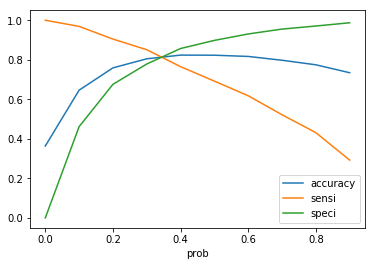

In [89]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### It looks like the most optimal cut off is going to be ~0.35. Hence we will change accordingly

In [90]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.399641,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.835582,1,1,1,1,1,1,1,1,1,1,0,1
2,1,0.596614,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.244275,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.821997,1,1,1,1,1,1,1,1,1,1,0,1


In [91]:
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted), 4) * 100

81.64

In [92]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2916,  684],
       [ 355, 1703]], dtype=int64)

In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity of the model below

In [94]:
round(TP / float(TP+FN), 4) * 100

82.75

#### Specificity of the model below

In [95]:
round(TN / float(TN+FP), 4) * 100

81.0

#### Precision of the mode below

In [96]:
round(TP/float(TP+FP), 4) * 100

71.34

## Making predictions on the test set

In [97]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
8391,3.0,82,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8240,2.0,1135,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9104,4.0,860,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3440,4.0,126,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8958,4.0,874,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

In [99]:
X_test.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,...,2425.0,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,-0.006285,-0.017702,-0.023578,0.458969,0.070515,0.037526,0.008247,0.035052,0.042474,0.005773,...,0.0,0.011959,0.002887,0.126186,0.063918,0.000412,0.284536,0.008247,0.008247,0.000825
std,1.006323,0.986791,0.988341,0.498416,0.256067,0.190085,0.090459,0.183948,0.201710,0.075778,...,0.0,0.108723,0.053661,0.332127,0.244656,0.020307,0.451286,0.090459,0.090459,0.028712
min,-1.157389,-0.856715,-1.226003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.157389,-0.856715,-1.226003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.299412,-0.435062,-0.021521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.558565,0.590752,0.580720,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.132496,2.417917,2.387442,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
X_test = X_test[col]
X_test.describe()

,Total Time Spent on Website,"Specialization_Banking, Investment And Insurance",Specialization_Operations Management,Specialization_Retail Management,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_03.Low,lead_source_group_Indirect,lead_quality_group_High,lead_quality_group_Low,lead_quality_group_Medium,Lead_Origin_group_API,Lead_Origin_group_Landing Page Submission,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,-0.017702,0.035052,0.051959,0.007010,0.092371,0.041649,0.291546,0.065567,0.127010,0.271340,0.428041,0.497732,0.030103,0.383093,0.126186,0.284536
std,0.986791,0.183948,0.221990,0.083451,0.289609,0.199828,0.454568,0.247575,0.333053,0.444743,0.494897,0.500098,0.170906,0.486241,0.332127,0.451286
min,-0.856715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.856715,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.435062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590752,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2.417917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
X_test_sm = sm.add_constant(X_test)

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
y_test_pred[:10]

8391    0.900987
8240    0.208128
9104    0.643881
3440    0.051453
8958    0.229013
6072    0.046037
3939    0.117035
4248    0.044092
3993    0.885429
1555    0.004632
dtype: float64

In [104]:
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
8391,0.900987
8240,0.208128
9104,0.643881
3440,0.051453
8958,0.229013


In [105]:
y_test_df = pd.DataFrame(y_test)

In [106]:
y_test_df['Lead Number'] = y_test_df.index

In [107]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,8391,0.900987
1,0,8240,0.208128
2,1,9104,0.643881
3,0,3440,0.051453
4,0,8958,0.229013


In [108]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final = y_pred_final.reindex_axis(['Lead Number','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,8391,1,0.900987
1,8240,0,0.208128
2,9104,1,0.643881
3,3440,0,0.051453
4,8958,0,0.229013


In [109]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [110]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,8391,1,0.900987,1
1,8240,0,0.208128,0
2,9104,1,0.643881,1
3,3440,0,0.051453,0
4,8958,0,0.229013,0


## The Accuracy and other metrics to determine how good the model is

### Accuracy

In [111]:
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted), 4) * 100

80.49

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1249,  301],
       [ 172,  703]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Sensitivity

In [114]:
round(TP / float(TP+FN), 4) * 100

80.34

### Specficity

In [115]:
round(TN / float(TN+FP), 4) * 100

80.58

### Prescision

In [116]:
round(TP/float(TP+FP), 4) * 100

70.02000000000001

## Using LogisticRegression for Prediction with PCA

In [117]:
## Set Index
lead4.set_index("Lead Number", inplace=True)

In [118]:
## X,y, Test Train, Split

# Putting feature variable to X
X = lead4.drop(['Converted'],axis=1)

# Putting output variable to y
y = lead4['Converted']

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
660681,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [121]:
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
623790,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
658652,-0.309401,-0.054884,-0.023944,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
643746,-0.309401,2.205086,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628594,0.547052,-0.660346,1.187691,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
603042,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [122]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
count,5.658000e+03,5.658000e+03,5.658000e+03,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,...,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000,5658.000000
mean,2.444924e-17,-2.590128e-18,4.571404e-16,0.458112,0.074761,0.041357,0.007953,0.034995,0.042595,0.006893,...,0.000177,0.012902,0.001591,0.114705,0.060092,0.000177,0.301520,0.008837,0.006716,0.000353
std,1.000088e+00,1.000088e+00,1.000088e+00,0.498286,0.263029,0.199133,0.088834,0.183783,0.201959,0.082744,...,0.013294,0.112862,0.039855,0.318694,0.237678,0.013294,0.458959,0.093598,0.081684,0.018799
min,-1.165853e+00,-8.600642e-01,-1.235578e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.165853e+00,-8.600642e-01,-1.235578e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.094006e-01,-4.206840e-01,-2.394359e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.470518e-01,6.930083e-01,5.818737e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,3.116409e+00,2.423725e+00,2.399325e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## PCA - Model Building

In [123]:
## Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
## Doing the PCA on the train data
pca.fit(X_train)
pca.components_

array([[ 5.60562450e-01,  4.00876077e-01,  5.72786990e-01, ...,
         3.44002937e-03,  4.13564813e-04,  7.41908231e-05],
       [-2.12840560e-01,  9.00196676e-01, -2.59549235e-01, ...,
        -4.08086586e-03, -2.19521842e-03, -4.58054045e-04],
       [ 3.94433825e-01, -6.21115347e-02,  2.13964922e-01, ...,
         4.64890110e-04,  5.90115535e-04,  8.24191064e-05],
       ...,
       [ 1.02094442e-04,  1.53357555e-04, -2.56803121e-04, ...,
        -1.17041762e-03, -9.16147754e-04, -4.41009688e-03],
       [ 4.47494063e-05,  6.15345073e-05, -7.68093554e-05, ...,
        -2.46167632e-01, -2.46451773e-01, -2.53594724e-01],
       [-5.87418061e-17,  3.65722574e-17,  1.73721370e-18, ...,
        -3.44090471e-16, -5.55179512e-16, -4.71230949e-16]])

In [124]:
## Verifying PC and variables
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(15)

,PC1,PC2,Feature
0,0.560562,-0.212841,TotalVisits
1,0.400876,0.900197,Total Time Spent on Website
2,0.572787,-0.259549,Page Views Per Visit
3,0.168132,-0.108816,City_Cities of Maharashtra
4,0.019247,0.005653,City_Other Cities
5,0.013903,-0.000139,City_Other Metro Cities
6,0.002554,-0.001646,City_Tier II Cities
7,0.010506,-0.007969,"Specialization_Banking, Investment And Insurance"
8,0.014601,-0.005714,Specialization_Business Administration
9,0.002653,-0.002079,Specialization_E-Business


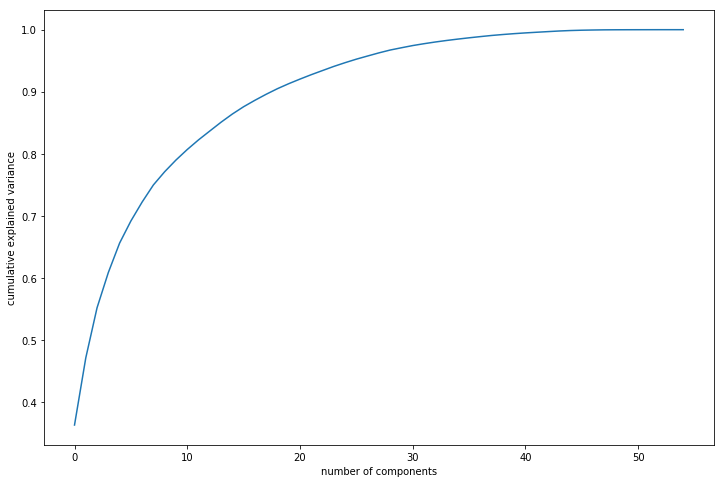

In [125]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [126]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=15, random_state=42)

In [127]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape


(5658, 15)

In [128]:
# We selected 15 components for PCA which will explain more than 80% of data

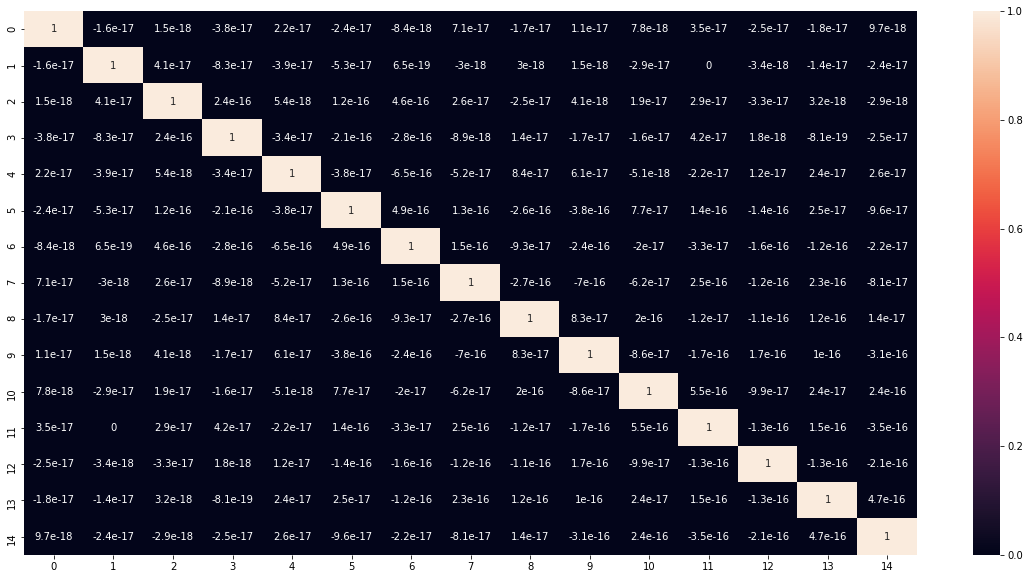

In [129]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(np.corrcoef(X_train_pca.transpose()),annot = True)

In [130]:
#training the regression model
logsk = LogisticRegression(random_state=42)
model = logsk.fit(X_train_pca,y_train)

In [131]:
round(model.score(X_train_pca, y_train) * 100, 2)

79.76

In [132]:
## 80% score for prediction

In [133]:
y_train.head()

Lead Number
623790    0
658652    0
643746    0
628594    0
603042    0
Name: Converted, dtype: int64

In [134]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_train_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
# Converting to column dataframe
y_pred_df = y_pred_df.iloc[:,[1]]
# Let's see the head
y_pred_df.head()

,1
0,0.135305
1,0.044182
2,0.709548
3,0.030105
4,0.085450


In [135]:
# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Converted
Lead Number,
623790,0
658652,0
643746,0
628594,0
603042,0


In [136]:
# Putting 'Lead Number' to index
y_train_df['Lead Number'] = y_train_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)
# Appending y_train_df and y_pred_df
y_pred_final = pd.concat([y_train_df,y_pred_df], axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead Number', 'Converted', 'Converted_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,623790,0,0.135305
1,658652,0,0.044182
2,643746,0,0.709548
3,628594,0,0.030105
4,603042,0,0.085450


In [137]:
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,623790,0,0.135305,0
1,658652,0,0.044182,0
2,643746,0,0.709548,1
3,628594,0,0.030105,0
4,603042,0,0.085450,0


In [138]:
for i in range(10):
    y_pred_final[i/10]= y_pred_final.Converted_Prob.map(lambda x: 1 if (x > (i/10)) else 0)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,623790,0,0.135305,0,1,1,0,0,0,0,0,0,0,0
1,658652,0,0.044182,0,1,0,0,0,0,0,0,0,0,0
2,643746,0,0.709548,1,1,1,1,1,1,1,1,1,0,0
3,628594,0,0.030105,0,1,0,0,0,0,0,0,0,0,0
4,603042,0,0.085450,0,1,0,0,0,0,0,0,0,0,0


In [139]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
confusion


array([[3115,  460],
       [ 685, 1398]], dtype=int64)

In [140]:
##Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted), 4) * 100


79.75999999999999

In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100

67.11

In [143]:
# Let us calculate specificity
round(TN / float(TN+FP), 4) * 100

87.13

In [144]:
# Calculate false postive rate - predicting churn when customer does not have churned
round(FP/ float(TN+FP), 4) * 100

12.870000000000001

In [145]:
# positive predictive value 
round(TP / float(TP+FP), 4)* 100

75.24

In [146]:
# Negative predictive value
round(TN / float(TN+ FN), 4) * 100

81.97

In [147]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

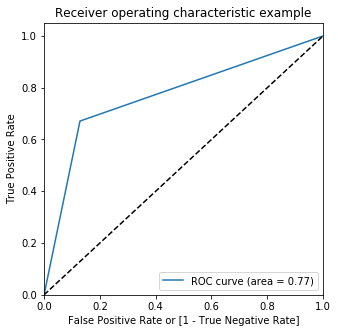

In [148]:
draw_roc(y_pred_final.Converted, y_pred_final.Predicted)

In [149]:
# Let's create cut off matrix based on different values we have calculated
from sklearn.metrics import precision_score, recall_score

cutoffmatrix_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final[i] )
    total1=sum(sum(cm))
    Accuracy = (cm[0,0] + cm[1,1]) / total1
    
    Specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    Sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    Precision = precision_score(y_pred_final.Converted, y_pred_final[i])
    Recall = recall_score(y_pred_final.Converted, y_pred_final[i])
    cutoffmatrix_df.loc[i] =[i, Accuracy, Sensitivity, Specificity, Precision, Recall]

cutoffmatrix_df

,Probability,Accuracy,Sensitivity,Specificity,Precision,Recall
0.0,0.0,0.368151,1.000000,0.000000,0.368151,1.000000
0.1,0.1,0.604454,0.963994,0.394965,0.481419,0.963994
0.2,0.2,0.712443,0.915026,0.594406,0.567938,0.915026
0.3,0.3,0.759809,0.843495,0.711049,0.629749,0.843495
0.4,0.4,0.794804,0.762842,0.813427,0.704344,0.762842
0.5,0.5,0.797632,0.671147,0.871329,0.752422,0.671147
0.6,0.6,0.788441,0.580893,0.909371,0.788787,0.580893
0.7,0.7,0.760339,0.446471,0.943217,0.820830,0.446471
0.8,0.8,0.716684,0.282765,0.969510,0.843840,0.282765
0.9,0.9,0.666667,0.109938,0.991049,0.877395,0.109938


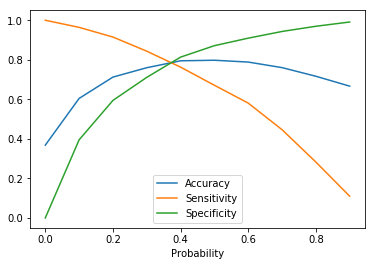

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoffmatrix_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### 0.35 is optimum value looking at graph and around 0.65 looks good Precision.
#### Since we are looking at predicting correct lead, let's take 0.35 as cut off

In [151]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['Predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
# Let's see the head
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,623790,0,0.135305,0,1,1,0,0,0,0,0,0,0,0
1,658652,0,0.044182,0,1,0,0,0,0,0,0,0,0,0
2,643746,0,0.709548,1,1,1,1,1,1,1,1,1,0,0
3,628594,0,0.030105,0,1,0,0,0,0,0,0,0,0,0
4,603042,0,0.085450,0,1,0,0,0,0,0,0,0,0,0


In [152]:
## Let's get precision
round(precision_score(y_pred_final.Converted, y_pred_final.Predicted), 4) * 100

68.35

In [153]:
##Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Predicted), 4) * 100


78.88

In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Predicted)
confusion
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100

79.4

In [156]:
# Let us calculate specificity
round(TN / float(TN+FP), 4) * 100

78.57

#### Based on above data model has Prediction ratio of 68% i.e. Predicts lead correctly
#### Model has 79% Sensitivity i.e. Identifying potential leads correctly
#### Model has 79% Specificity i.e. Identifying false leads correctly

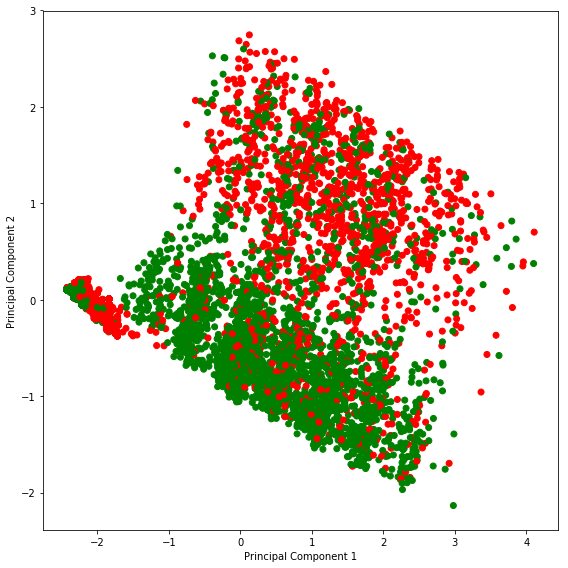

In [157]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [158]:
## Separation of PC1 and PC2 is quite visible

## PCA - Model Evaluation

In [159]:
X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
634700,1.403504,-0.475344,-0.326852,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584842,0.118826,2.247132,0.581874,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
584760,-0.309401,-0.712903,-0.023944,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
635710,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581589,-0.309401,-0.317671,-0.023944,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [160]:
X_test_pca = pca.transform(X_test)
X_test_pca.shape


(2425, 15)

In [161]:
y_test.head()


Lead Number
634700    0
584842    0
584760    0
635710    1
581589    0
Name: Converted, dtype: int64

In [162]:
# Making prediction on the test data
pred_prob_test = model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_prob_test))

'0.85'

In [163]:
# Predicted test probabilities
y_test_pred = logsk.predict_proba(X_test_pca)
# Converting y_test_pred to a dataframe which is an array
y_test_pred_df = pd.DataFrame(y_test_pred)
# Converting to column dataframe
y_test_pred_df = y_test_pred_df.iloc[:,[1]]
# Let's see the head
y_test_pred_df.head()


,1
0,0.349545
1,0.643892
2,0.165552
3,0.412740
4,0.024177


In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()
# Putting 'Lead Number' to index
y_test_df['Lead Number'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_test_pred_df
y_test_pred_final = pd.concat([y_test_df,y_test_pred_df], axis=1)
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 1 : 'Converted_Prob'})
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['Lead Number', 'Converted', 'Converted_Prob'], axis=1)
# Let's see the head of y_test_pred_final
y_test_pred_final.head()
# Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
# Let's see the head
y_test_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted
0,634700,0,0.349545,0
1,584842,0,0.643892,1
2,584760,0,0.165552,0
3,635710,1,0.412740,1
4,581589,0,0.024177,0


In [165]:
## Let's check the overall accuracy.
round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted), 4) * 100


77.07000000000001

In [166]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion2

array([[1196,  379],
       [ 177,  673]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN), 4) * 100

79.17999999999999

In [169]:
# Let us calculate specificity
round(TN / float(TN+FP), 4) * 100

75.94

In [170]:
## Let's get precision
round(precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted), 4) * 100

63.970000000000006

#### Based on Value of Sensitivity = 79% and Specificity = 76% and Precision as 64%
#### Test data has 85% ROC coverage.
#### We can say model is High Specific i.e. Can predict negative values correctly when Lead is not going to convert and is High Sensitive i.e. prediction when Lead is correct. Comparing to Train data set values, these values look good and within acceptable range.

In [171]:
## Let's add lead score to all entries

In [172]:
X[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.transform(X[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
660728,0.975278,0.556884,0.278965,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,-0.309401,2.360656,-0.023944,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660719,-0.737627,-0.218863,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
660681,-0.309401,2.142017,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [174]:
X_pca_all = pca.transform(X)
X_pca_all.shape

# Predicted test probabilities
y_pred_all = pd.DataFrame(logsk.predict_proba(X_pca_all)).iloc[:,[1]]

# Let's see the head
y_pred_all.head(10)


,1
0,0.206705
1,0.272259
2,0.839773
3,0.140153
4,0.772629
5,0.058277
6,0.087415
7,0.052416
8,0.076620
9,0.425166


In [175]:
# Converting y_test to dataframe
y_all = pd.DataFrame(y)
# Putting 'Lead Number' to index
y_all['Lead Number'] = y_all.index
y_all.head()


,Converted,Lead Number
Lead Number,,
660737,0,660737
660728,0,660728
660727,1,660727
660719,0,660719
660681,1,660681


In [176]:
y_pred_all.reset_index(drop=True, inplace=True)
y_all.reset_index(drop=True, inplace=True)
y_all = pd.concat([y_all, y_pred_all], axis=1)
# Renaming the column 
y_all = y_all.rename(columns={ 1 : 'Converted_Prob'})
y_all.head()

,Converted,Lead Number,Converted_Prob
0,0,660737,0.206705
1,0,660728,0.272259
2,1,660727,0.839773
3,0,660719,0.140153
4,1,660681,0.772629


In [177]:
X['Lead Number'] = X.index
lead_final_df = pd.merge(X, y_all, on='Lead Number', how='inner')
lead_final_df.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Lead Number,Converted,Converted_Prob
0,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,660737,0,0.206705
1,0.975278,0.556884,0.278965,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,660728,0,0.272259
2,-0.309401,2.360656,-0.023944,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,660727,1,0.839773
3,-0.737627,-0.218863,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,660719,0,0.140153
4,-0.309401,2.142017,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,660681,1,0.772629


In [178]:
lead_final_df['Lead Score'] = round(lead_final_df.Converted_Prob * 100)
lead_final_df['Predicted'] = lead_final_df.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
lead_final_df.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,City_Cities of Maharashtra,City_Other Cities,City_Other Metro Cities,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,...,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Lead Number,Converted,Converted_Prob,Lead Score,Predicted
0,-1.165853,-0.860064,-1.235578,0,0,0,0,0,0,0,...,0,0,0,0,0,660737,0,0.206705,21.0,0
1,0.975278,0.556884,0.278965,0,0,0,0,0,0,0,...,0,0,0,0,0,660728,0,0.272259,27.0,0
2,-0.309401,2.360656,-0.023944,1,0,0,0,0,1,0,...,0,0,0,0,0,660727,1,0.839773,84.0,1
3,-0.737627,-0.218863,-0.629761,1,0,0,0,0,0,0,...,0,0,1,0,0,660719,0,0.140153,14.0,0
4,-0.309401,2.142017,-0.629761,1,0,0,0,0,0,0,...,0,0,0,0,0,660681,1,0.772629,77.0,1


##### For higher Sensitivity or conversion rate, chose Lead Score as 20 whereas to reduce unwanted phone calls chose high Specificity and Lead Score as 60 or higher.